# Random Forest training

### First fit of the model

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [2]:
df_train = pd.read_csv("data/data_train.csv")
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,10,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,9,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


In [3]:
X_train = df_train.drop("income", axis=1)
y_train = df_train["income"]

In [4]:
df_test = pd.read_csv("data/data_test.csv")
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,2,215419,0,13,2,3,0,0,1,0,0,36,0,0
16277,64,5,321403,1,9,6,11,5,1,0,0,0,40,0,0
16278,38,2,374983,0,13,1,3,1,0,0,0,0,50,0,0
16279,44,2,83891,0,13,2,0,3,2,0,5455,0,40,0,0


In [5]:
X_test = df_test.drop("income", axis=1)
y_test = df_test["income"]

In [6]:
model = RandomForestClassifier()

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [9]:
accu_train = model.score(X_train, y_train)
accu_train

0.9999692884125181

In [10]:
accu_test = model.score(X_test, y_test)
accu_test

0.8540630182421227

In [11]:
f1_train = f1_score(y_train, pred_train)
f1_train

0.9999362366894088

In [12]:
f1_test = f1_score(y_test, pred_test)
f1_test

0.6623081296191018

In [15]:
auc_train = roc_auc_score(y_train, pred_train)
auc_train

0.9999797734627831

In [16]:
auc_test = roc_auc_score(y_test, pred_test)
auc_test

0.7683323014464607

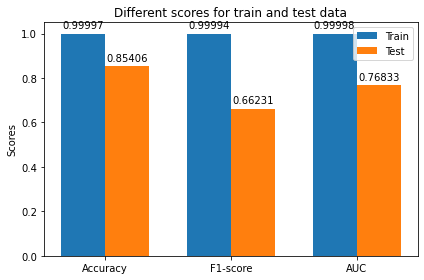

In [18]:
labels = ["Accuracy", "F1-score", "AUC"]
train = [accu_train, f1_train, auc_train]
test = [accu_test, f1_test, auc_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Different scores for train and test data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Hyper parameter tuning

In [19]:
param_rf = {
    "n_estimators" : [100, 200, 400],
    "max_depth": [4, 8, 12, None],
    "max_features" : ["log2", "sqrt", "auto", None],
    "oob_score" : [True, False]
}

In [20]:
grid = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= param_rf,
                        cv= 3,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= 10)
result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [32]:
grid_mean_score = result.cv_results_["mean_test_score"]
grid_params = result.cv_results_["params"]

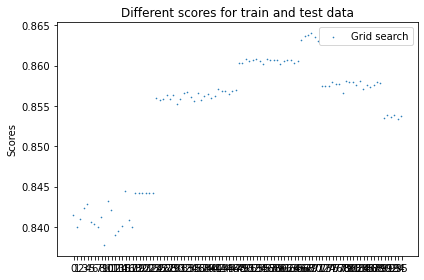

<Figure size 1600x1600 with 0 Axes>

In [39]:
labels = range(len(grid_params))
scores = grid_mean_score

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.scatter(x - width/2, scores, width, label='Grid search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Different scores for train and test data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [28]:
print(result.best_params_, result.best_score_)

{'max_depth': 12, 'max_features': None, 'n_estimators': 200, 'oob_score': False} 0.8640399340131736


In [29]:
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("The mean generalization accuracy of the model is {:.2f}% (+/- {:.2f}%)".format(np.mean(all_accuracies) * 100, np.std(all_accuracies) * 100))

The mean generalization accuracy of the model is 85.73% (+/- 0.41%)


#### Validation Curve

In [102]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100, 200], cv = 3)

In [103]:
test_scoreNum

array([[0.8528653 , 0.85811682, 0.85847231],
       [0.85332596, 0.85876175, 0.86059154]])

### ROC curve

In [104]:
model_tuned = RandomForestClassifier(max_depth=12,
                               max_features=None,
                               n_estimators=400,
                               oob_score=True
                              )

In [105]:
model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=None, n_estimators=400,
                       oob_score=True)

In [106]:
probs = model_tuned.predict_proba(X_test)

probs = probs[:, 1]

Text(0.5, 1.0, 'ROC curve')

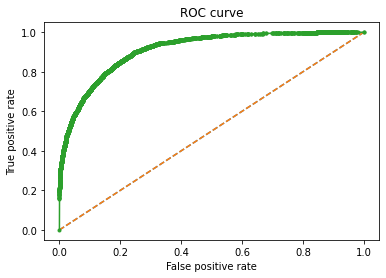

In [107]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs, drop_intermediate = True)

plt.plot([(0,0), (1,1)], linestyle="--")
plt.plot(false_positive_rate, true_positive_rate, marker=".")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

#### Moving threshold based on ROC curve

In [108]:
gmeans = np.sqrt(true_positive_rate * (1 - false_positive_rate))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.269265, G-Mean=0.825


Text(0.5, 1.0, 'ROC curve')

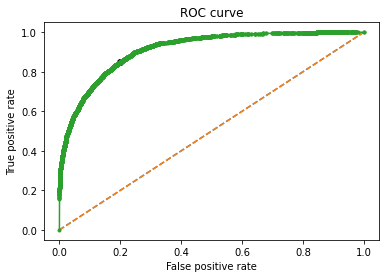

In [109]:
plt.plot([(0,0), (1,1)], linestyle="--", label="No skill")
plt.plot(false_positive_rate, true_positive_rate, marker=".", label="Random Forest")
plt.scatter(false_positive_rate[ix], true_positive_rate[ix], marker='o', color='black', label='Best')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

In [110]:
threshold = 0.4

predicted_proba = model_tuned.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.8557828143234445


In [112]:
f1_score(y_test, predicted)

0.6933925306868634